**Importing The Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Importing The Data Set**

I added a 'Date' column in the data set using excel for further analysis. Total number of records before the data cleaning was 366, that's why I chose 2020-01-01 as starting date, as it is a leap year.

In [2]:
weather_df = pd.read_excel("weather.xlsx")

In [3]:
weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Date
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes,2020-01-01
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes,2020-01-02
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes,2020-01-03
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes,2020-01-04
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No,2020-01-05


In [4]:
weather_df.shape

(366, 23)

In [5]:
pd.isnull(weather_df).sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
Date              0
dtype: int64

**Data Cleaning**

In [6]:
weather_df = weather_df.dropna()

In [7]:
pd.isnull(weather_df).sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
Date             0
dtype: int64

In [8]:
cleaned_df = weather_df.drop_duplicates()

In [9]:
cleaned_df.shape

(328, 23)

In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 0 to 365
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MinTemp        328 non-null    float64       
 1   MaxTemp        328 non-null    float64       
 2   Rainfall       328 non-null    float64       
 3   Evaporation    328 non-null    float64       
 4   Sunshine       328 non-null    float64       
 5   WindGustDir    328 non-null    object        
 6   WindGustSpeed  328 non-null    float64       
 7   WindDir9am     328 non-null    object        
 8   WindDir3pm     328 non-null    object        
 9   WindSpeed9am   328 non-null    float64       
 10  WindSpeed3pm   328 non-null    int64         
 11  Humidity9am    328 non-null    int64         
 12  Humidity3pm    328 non-null    int64         
 13  Pressure9am    328 non-null    float64       
 14  Pressure3pm    328 non-null    float64       
 15  Cloud9am       328 non-null 

In [11]:
cleaned_df[["WindSpeed3pm", "Humidity9am", "Humidity3pm", "Cloud9am", "Cloud3pm"]] = cleaned_df[["WindSpeed3pm", "Humidity9am", "Humidity3pm", "Cloud9am", "Cloud3pm"]].astype(float)

In [12]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 0 to 365
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MinTemp        328 non-null    float64       
 1   MaxTemp        328 non-null    float64       
 2   Rainfall       328 non-null    float64       
 3   Evaporation    328 non-null    float64       
 4   Sunshine       328 non-null    float64       
 5   WindGustDir    328 non-null    object        
 6   WindGustSpeed  328 non-null    float64       
 7   WindDir9am     328 non-null    object        
 8   WindDir3pm     328 non-null    object        
 9   WindSpeed9am   328 non-null    float64       
 10  WindSpeed3pm   328 non-null    float64       
 11  Humidity9am    328 non-null    float64       
 12  Humidity3pm    328 non-null    float64       
 13  Pressure9am    328 non-null    float64       
 14  Pressure3pm    328 non-null    float64       
 15  Cloud9am       328 non-null 

In [13]:
cleaned_df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'Date'],
      dtype='object')

**1. Descriptive Statistics**

In [14]:
cleaned_df[["MinTemp", "MaxTemp", "Rainfall", "Evaporation"]].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,328.0,7.742988,5.945199,-5.3,2.85,7.9,12.8,20.9
MaxTemp,328.0,20.897561,6.707310,7.6,15.50,20.4,25.8,35.8
Rainfall,328.0,1.440854,4.289427,0.0,0.00,0.0,0.2,39.8
Evaporation,328.0,4.702439,2.681183,0.2,2.55,4.4,6.6,13.8


**2. Time Series Visualization**

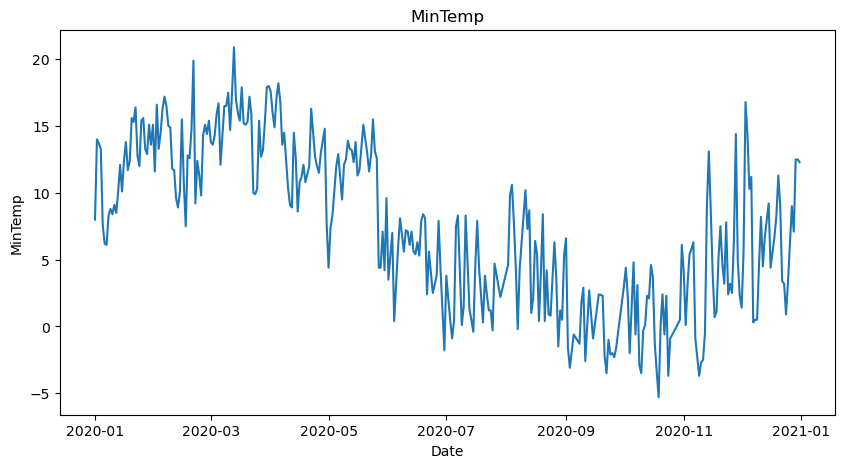

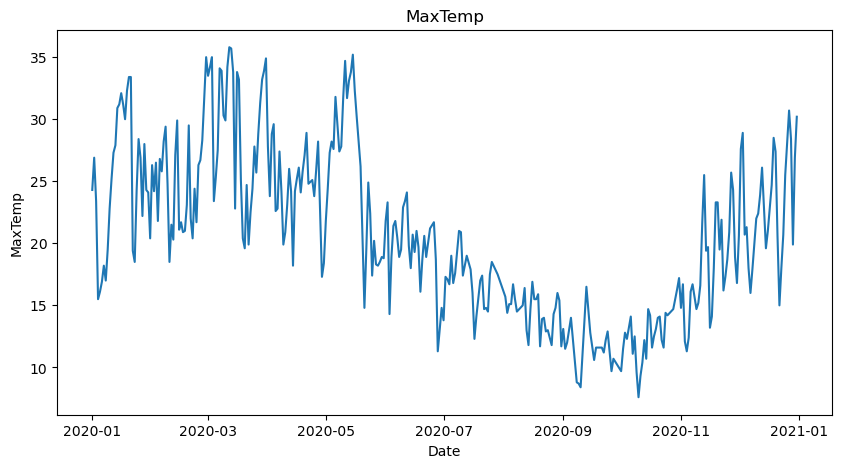

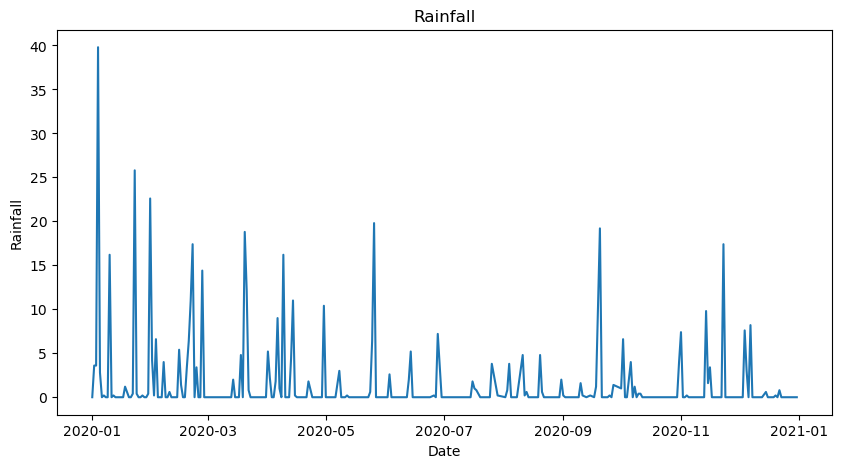

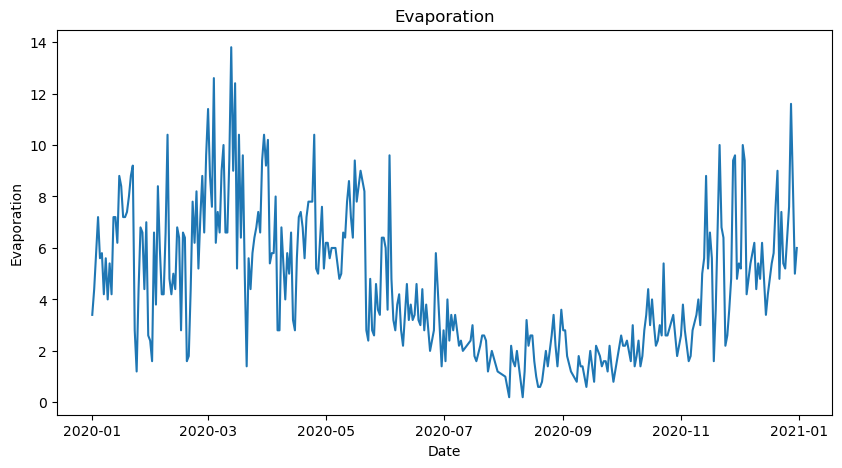

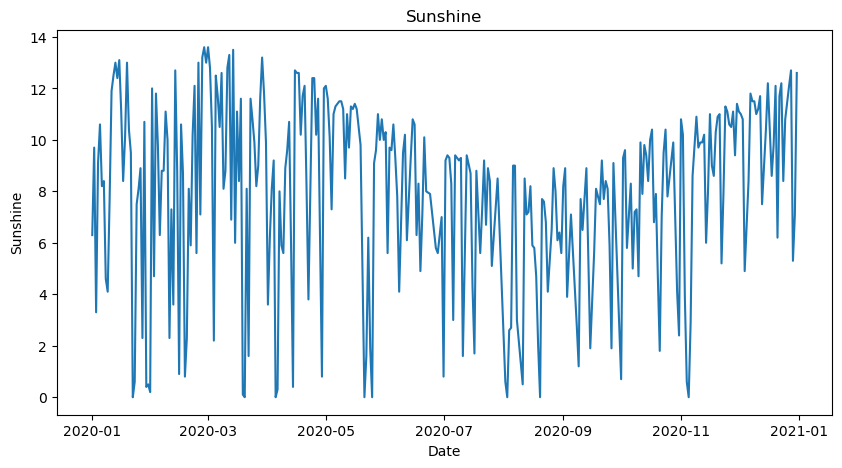

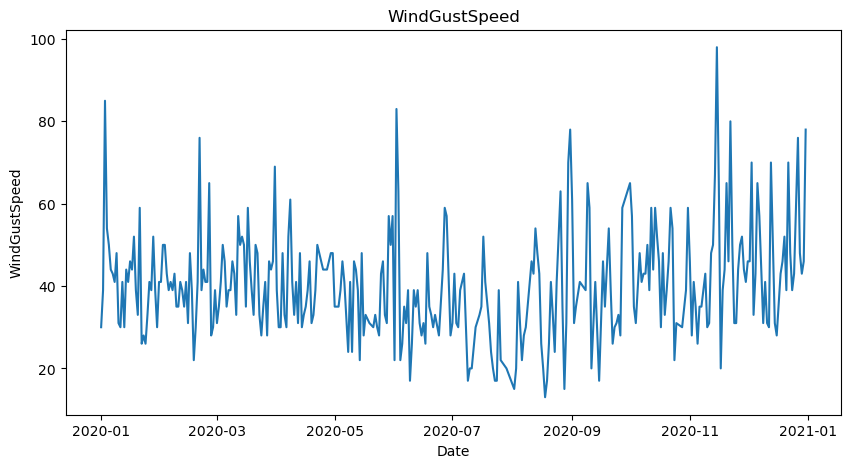

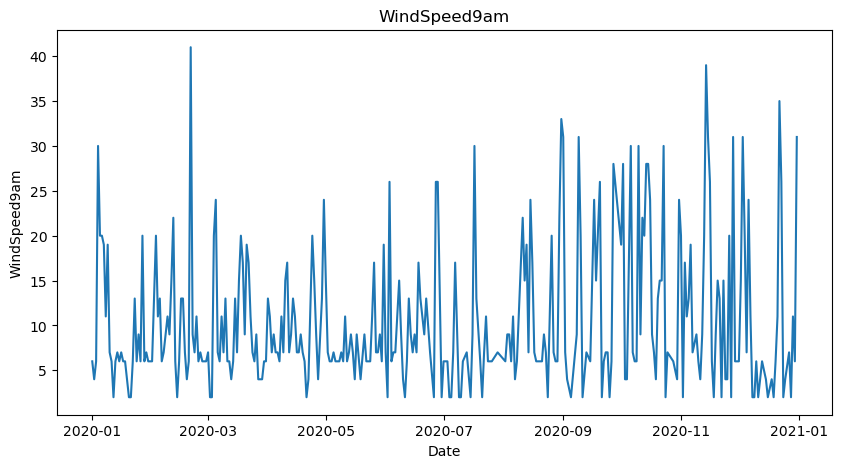

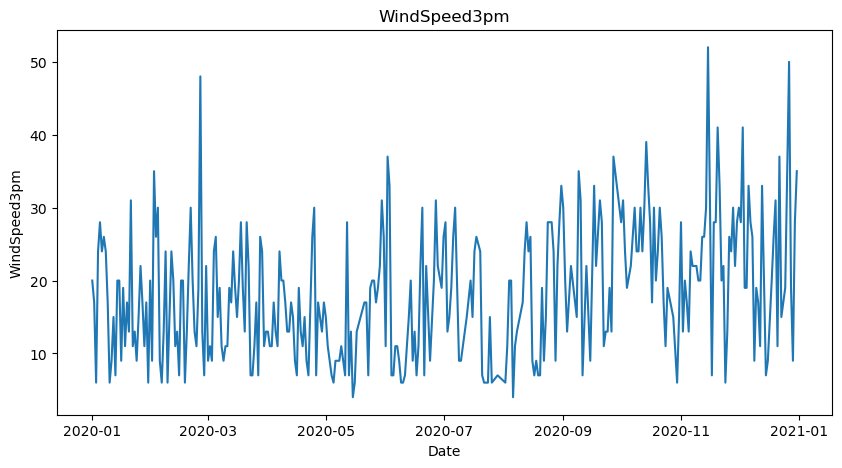

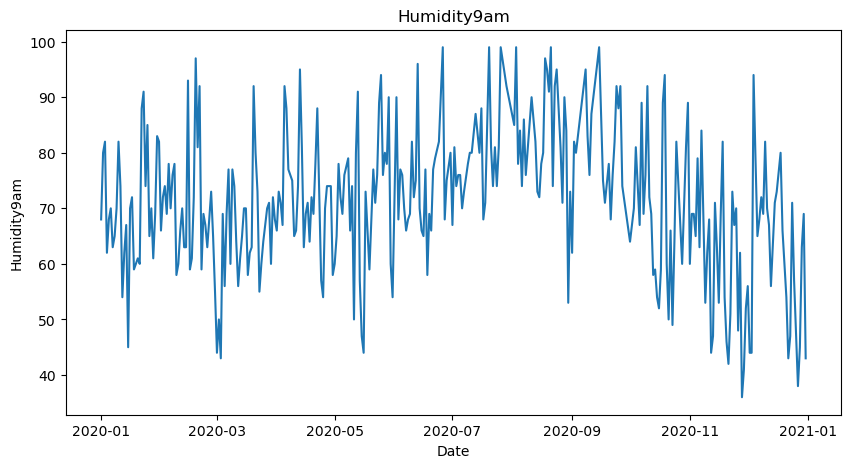

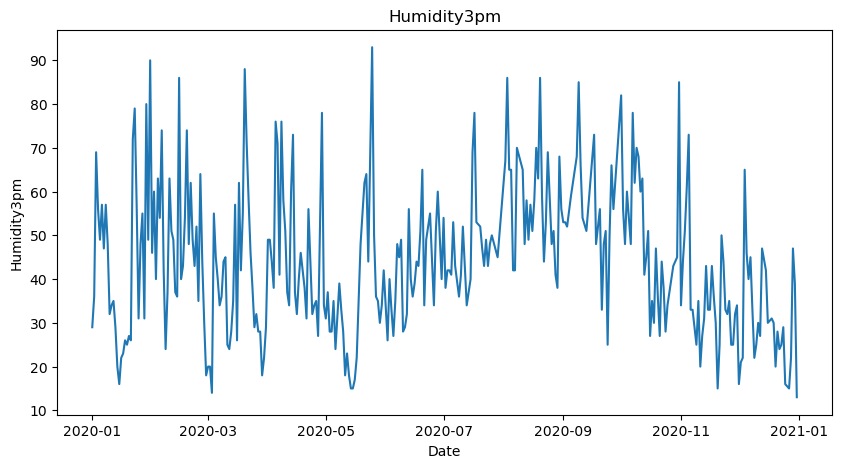

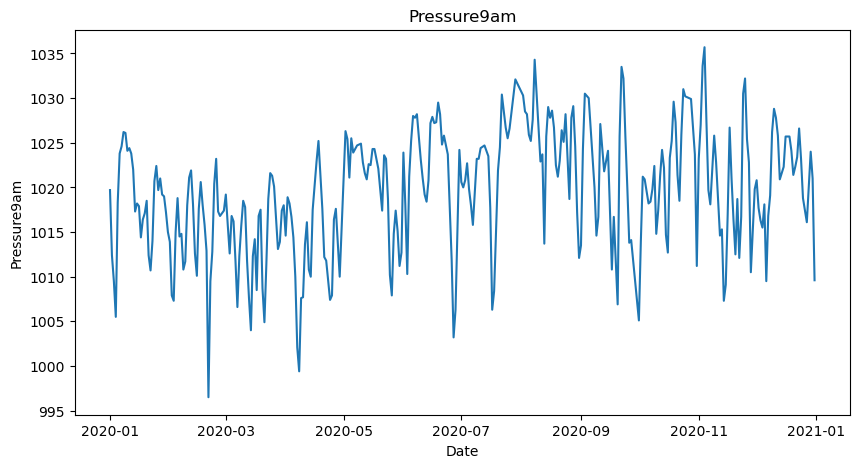

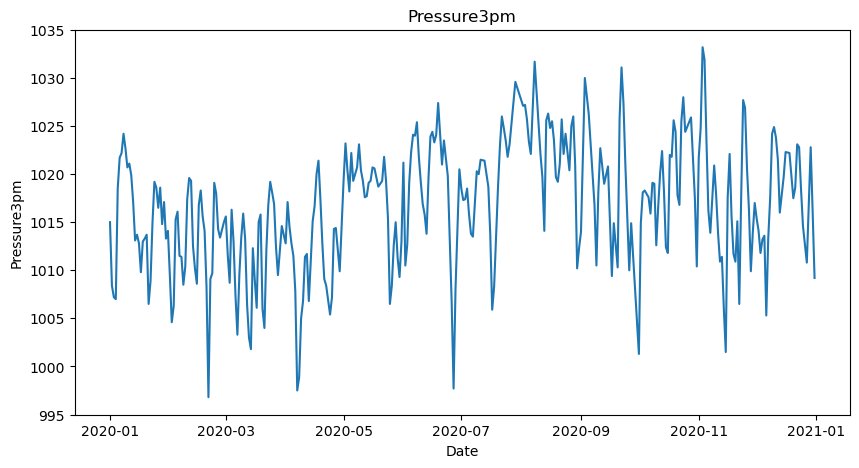

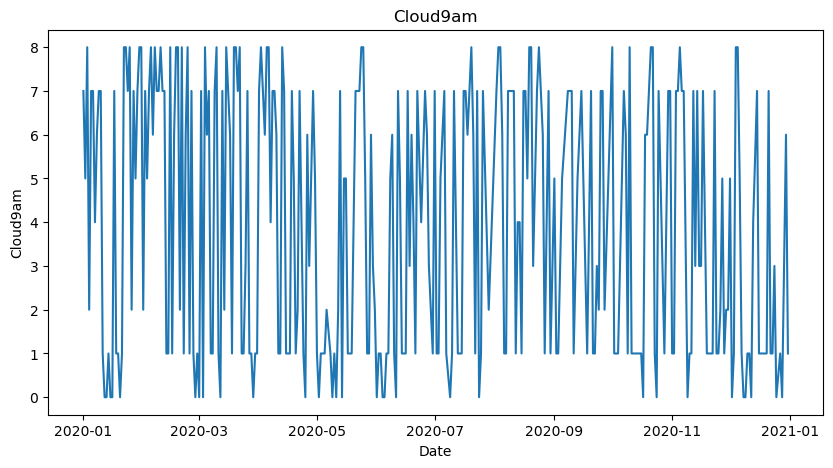

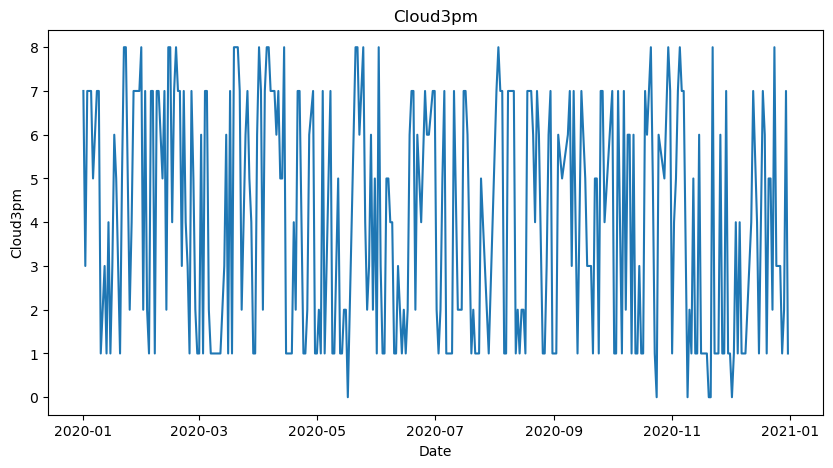

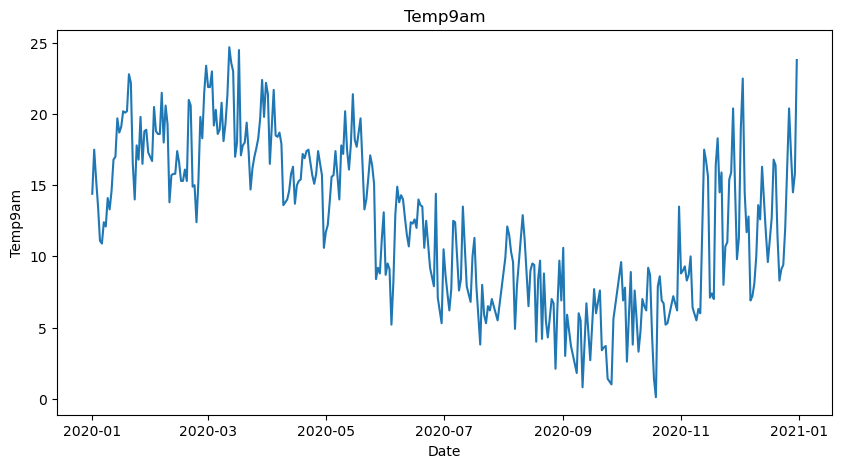

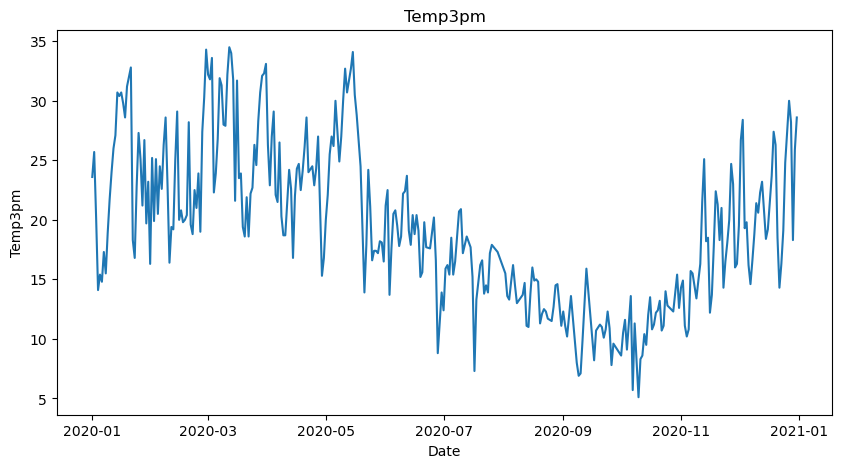

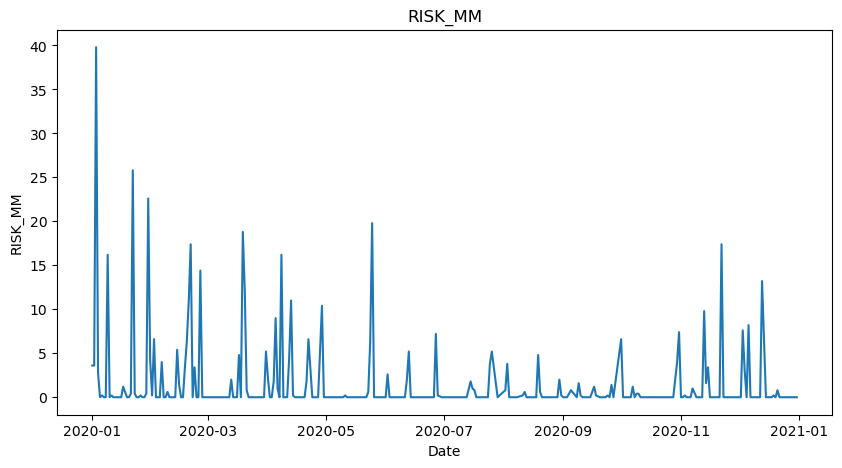

In [15]:
dates = cleaned_df["Date"]

columns_to_plot = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                   'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                   'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                   'Temp9am', 'Temp3pm', 'RISK_MM']

for column in columns_to_plot:
    plt.figure(figsize=(10, 5))  
    plt.plot(dates, cleaned_df[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.show()

**3. Correlation Analysis**

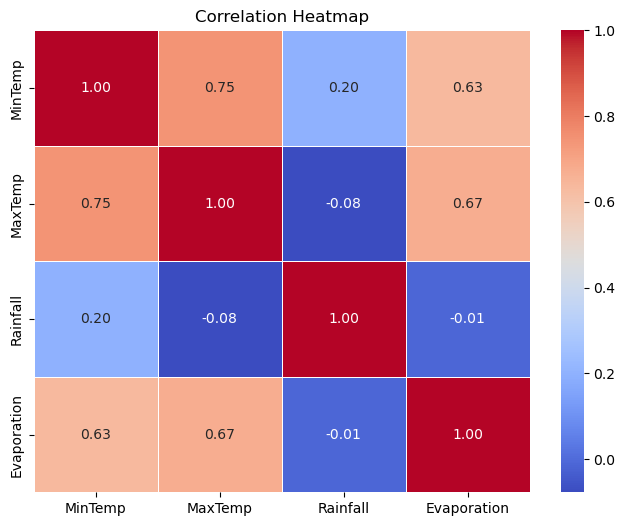

In [16]:
correlation_matrix = cleaned_df[["MinTemp", "MaxTemp", "Rainfall", "Evaporation"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**4. Rainfall Distribution**

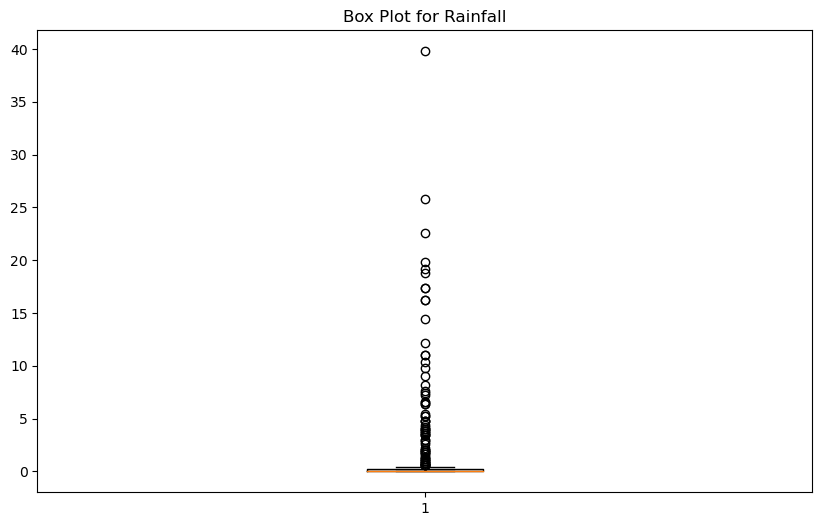

In [17]:
plt.figure(figsize=(10, 6))  
plt.boxplot(cleaned_df['Rainfall'])
plt.title('Box Plot for Rainfall')
plt.show()

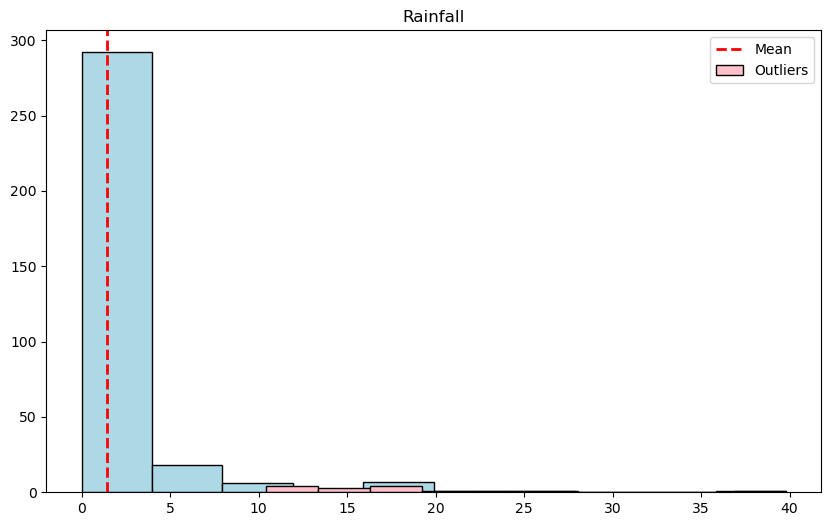

In [18]:
plt.figure(figsize = (10, 6))

plt.hist(cleaned_df["Rainfall"], color = "lightblue", edgecolor = 'black')
plt.axvline(cleaned_df['Rainfall'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.hist(cleaned_df.loc[cleaned_df['Rainfall'] > 10, 'Rainfall'], edgecolor='black', color='pink', label='Outliers')

plt.title("Rainfall")
plt.legend()
plt.show()

Creating a 'Season' column

In [19]:
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])

def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

cleaned_df['Season'] = cleaned_df['Date'].dt.month.apply(get_season)

In [20]:
cleaned_df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'Date', 'Season'],
      dtype='object')

**5. Seasonal Analysis**

Finding the average of each column.

In [21]:
columns_to_average = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                      'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                      'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
                      'Cloud3pm', 'Temp9am', 'Temp3pm']

means = {}
for column in columns_to_average:
    means[column] = cleaned_df[column].mean()

for column, mean_value in means.items():
    print(f"Mean of {column}: {mean_value:.2f}")

Mean of MinTemp: 7.74
Mean of MaxTemp: 20.90
Mean of Rainfall: 1.44
Mean of Evaporation: 4.70
Mean of Sunshine: 8.01
Mean of WindGustSpeed: 40.40
Mean of WindSpeed9am: 10.41
Mean of WindSpeed3pm: 18.19
Mean of Humidity9am: 71.10
Mean of Humidity3pm: 44.00
Mean of Pressure9am: 1019.35
Mean of Pressure3pm: 1016.53
Mean of Cloud9am: 3.91
Mean of Cloud3pm: 4.00
Mean of Temp9am: 12.82
Mean of Temp3pm: 19.56


In [22]:
cleaned_df["Season"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

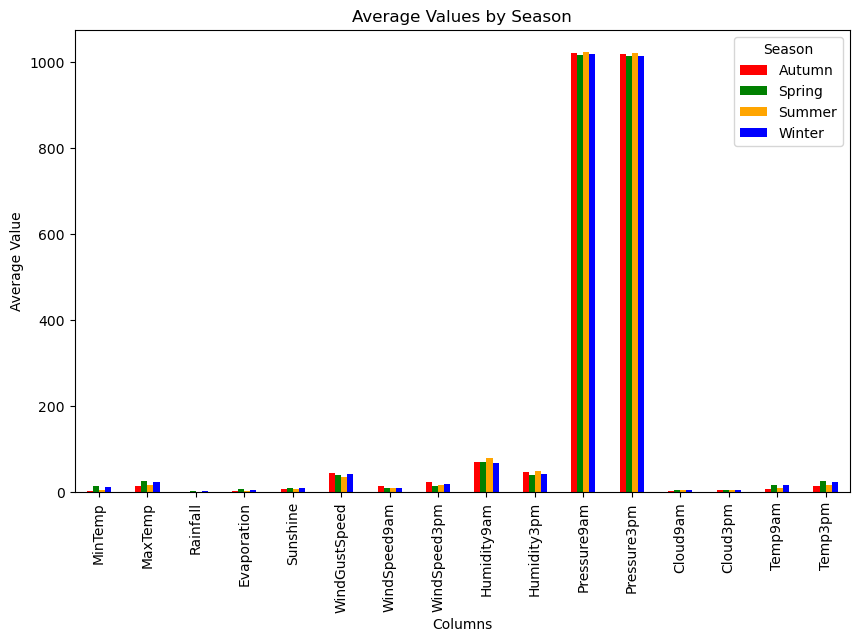

In [23]:
means_by_season = cleaned_df.groupby('Season')[columns_to_average].mean()

season_colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'orange', 'Autumn': 'red'}

fig, ax = plt.subplots(figsize=(10, 6))
means_by_season.T.plot(kind='bar', ax=ax, color=[season_colors[season] for season in means_by_season.index])
plt.title('Average Values by Season')
plt.ylabel('Average Value')
plt.xlabel('Columns')
plt.legend(title='Season', loc='upper right')
plt.show()